In [52]:
import math
import numpy as np

N0 = (2**(7/2))/(3*np.sqrt(math.pi))
c = 3e5 # speed of light in km/s^2
Mpc2cm = 3.086e24 # 1 Mpc = 3.086e24 cm
omega_b = 0.044 # baryon density
rho_crit = 4.755e-6 # critical density in (GeV/c^2)*cm^-3
YHe = 0.24 # helium mass fraction
Yp = 1.0-YHe # proton mass fraction
k = 8.617e-14 # Boltzmann constant in GeV/K
T0 = 2.73 # temperature of CMB today in K
kT0 = k*T0

B = c*Mpc2cm*N0*omega_b*rho_crit*Yp*(kT0**0.5)

omega_rad = 1.0e-4 # radiation density
H0 = 67.27 # Hubble constant in km/s/Mpc
mp = 1.0 # proton mass in GeV/c^2

mx = 1.0 # dark matter mass in GeV/c^2
sigma0 = 1.8e-25 # cross section in cm^2

zth = np.power((H0*np.sqrt(omega_rad)*np.sqrt(mx+mp)*np.sqrt(mx*mp)*((mx+mp)/mx))/(B*sigma0), 2./3.)
print(zth)

from scipy.optimize import fsolve

def func(x):
    return [(((mx/(mx+mp))*(B*sigma0*(1/(mx+mp))*(((x[0])*((1/mp)+(1/mx)))**(0.5)))) - (H0*math.sqrt(omega_rad)*(x[0]**2))),
            ((B*sigma0*(1/(mx+mp))*((((x[1])/mp)+(((x[1])**2)/(mx*x[0])))**(0.5))) - (H0*math.sqrt(omega_rad)*(x[1]**2)))]

root = fsolve(func, [1, 1])
zth = 1/root[0]
zcrit = 1/root[1]
print("zth:", zth)
print("zcrit:", zcrit)

kcrit = (2*H0*(math.sqrt(omega_rad))*zcrit)/c # 1/Mpc
print("kcrit:", kcrit)

k = 0.0857 # 1/Mpc
bool(kcrit > k)

169171.7559705463
zth: 169171.75597054456
zcrit: 95615.49032033558
kcrit: 0.4288036022565983


True

zcrit: 19109.55849561469 

mx: 1.000000e-06
zth: 10759990.984011741
sigma0: 6.626221240518976e-29 

mx: 1.000000e-03
zth: 4351870.758365556
sigma0: 3.298332425610024e-27 

mx: 1.000000e+00
zth: 32803.95542918368
sigma0: 1.947430896791931e-24 

mx: 1.000000e+03
zth: 19121.51020788051
sigma0: 1.6242325068383254e-21 

Percent errors:
1.000000e-06 : 7475.961951440706
1.000000e-03 : 642.7995980565465
1.000000e+00 : 89.93545802714348
1.000000e+03 : 96.52759073823819


/home/davidvng/anaconda3/envs/dmeff/lib/python3.8/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


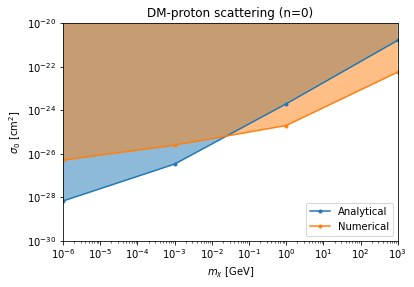

In [35]:
import math
import numpy as np
from scipy.optimize import fsolve

N0 = (2**(7/2))/(3*np.sqrt(math.pi))
c = 3e5 # speed of light in km/s^2
Mpc2cm = 3.086e24 # 1 Mpc = 3.086e24 cm
omega_b = 0.044 # baryon density
rho_crit = 4.755e-6 # critical density in (GeV/c^2)*cm^-3
YHe = 0.24 # helium mass fraction
Yp = 1.0-YHe # proton mass fraction
k = 8.617e-14 # Boltzmann constant in GeV/K
T0 = 2.73 # temperature of CMB today in K
kT0 = k*T0

B = c*Mpc2cm*N0*omega_b*rho_crit*Yp*(kT0**0.5)

omega_rad = 1.0e-4 # radiation density
H0 = 67.27 # Hubble constant in km/s/Mpc
mp = 0.938 # proton mass in GeV/c^2

#mx = 1.0 # dark matter mass in GeV/c^2
#sigma0 = 1.8e-25 # cross section in cm^2

kcrit = 0.0857 # 1/Mpc

zcrit = (kcrit*c)/(2*H0*(math.sqrt(omega_rad)))
print("zcrit:", zcrit, "\n")

masses = np.array([1.0e-6, 1.0e-3, 1.0, 1.0e3])
sigmas = np.zeros(len(masses))

for i in range(len(masses)):
    mx=masses[i]
    print("mx:", format(mx, 'e'))
    
    def func(x):
        return [(((mx/(mx+mp))*(B*x[1]*(1/(mx+mp))*(((x[0])*((1/mp)+(1/mx)))**(0.5)))) - (H0*math.sqrt(omega_rad)*(x[0]**2))),
                ((B*x[1]*(1/(mx+mp))*((((1/zcrit)/mp)+(((1/zcrit)**2)/(mx*x[0])))**(0.5))) - (H0*math.sqrt(omega_rad)*((1/zcrit)**2)))]

    root = fsolve(func, [1.0e4, 1.0e-25])
    zth = 1/root[0]
    sigma0 = root[1]
    sigmas[i] = root[1]
    print("zth:", zth)
    print("sigma0:", sigma0, "\n")
    
import matplotlib.pyplot as plt

proton_chains = np.array([5.02e-27, 2.45e-26, 1.96e-25, 5.64e-23])

f,ax = plt.subplots()

ax.plot(masses, sigmas, marker='.', label='Analytical')
ax.plot(masses, proton_chains, marker='.', label='Numerical')
ax.set_title('DM-proton scattering (n=0)')
ax.set_xlabel('$m_\chi$ $[\mathrm{GeV}]$')
ax.set_ylabel('$\sigma_0$ $[\mathrm{cm}^2]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-6, 1.0e3])
ax.set_ylim([1.0e-30, 1.0e-20])
ax.fill_between(masses, sigmas, 1.0e-20, alpha=0.5)
ax.fill_between(masses, proton_chains, 1.0e-20, alpha=0.5)
plt.legend(loc="lower right")

print("Percent errors:")
for i in range(len(sigmas)):
    error = abs((proton_chains[i]-sigmas[i])/sigmas[i])*100
    print(format(masses[i], 'e'), ":", error)

In [36]:
import math
import numpy as np

N0 = (2**(7/2))/(3*np.sqrt(math.pi))
c = 3e5 # speed of light in km/s^2
Mpc2cm = 3.086e24 # 1 Mpc = 3.086e24 cm
omega_b = 0.044 # baryon density
rho_crit = 4.755e-6 # critical density in (GeV/c^2)*cm^-3
YHe = 0.24 # helium mass fraction
Yp = (1.0-YHe)/1836.152 # proton mass fraction
k = 8.617e-14 # Boltzmann constant in GeV/K
T0 = 2.73 # temperature of CMB today in K
kT0 = k*T0

B = c*Mpc2cm*N0*omega_b*rho_crit*Yp*(kT0**0.5)

omega_rad = 1.0e-4 # radiation density
H0 = 67.27 # Hubble constant in km/s/Mpc
mp = 0.511e-3 # proton mass in GeV/c^2

mx = 1.0 # dark matter mass in GeV/c^2
sigma0 = 6.0e-24 # cross section in cm^2

from scipy.optimize import fsolve

def func(x):
    return [(((mx/(mx+mp))*(B*sigma0*(1/(mx+mp))*(((x[0])*((1/mp)+(1/mx)))**(0.5)))) - (H0*math.sqrt(omega_rad)*(x[0]**2))),
            ((B*sigma0*(1/(mx+mp))*((((x[1])/mp)+(((x[1])**2)/(mx*x[0])))**(0.5))) - (H0*math.sqrt(omega_rad)*(x[1]**2)))]

root = fsolve(func, [1, 1])
zth = 1/root[0]
zcrit = 1/root[1]
print("zth:", zth)
print("zcrit:", zcrit)

kcrit = (2*H0*(math.sqrt(omega_rad))*zcrit)/c # 1/Mpc
print("kcrit:", kcrit)

k = 0.0857 # 1/Mpc
bool(kcrit > k)

zth: 97951.99503653085
zcrit: 97918.63458056582
kcrit: 0.4391324365489775


True

zcrit: 19109.55849561469 

mx: 1.000000e-06
zth: 3962243.53716694
sigma0: 1.094394617464771e-28 

mx: 1.000000e-03
zth: 26170.07203450285
sigma0: 8.063576248764507e-26 

mx: 1.000000e+00
zth: 19116.069039674465
sigma0: 6.959423955313367e-23 

mx: 1.000000e+03
zth: 19109.565005604833
sigma0: 6.957648886688226e-20 

Percent errors:
1.000000e-06 : 804.6097122566199
1.000000e-03 : 92.83196460021618
1.000000e+00 : 92.05394004517002
1.000000e+03 : 94.59587561655512


/home/davidvng/anaconda3/envs/dmeff/lib/python3.8/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


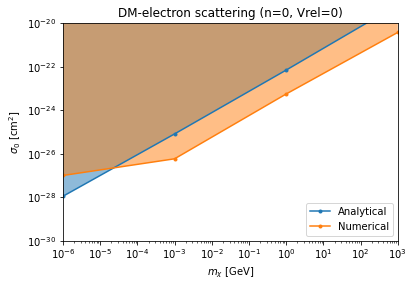

In [38]:
import math
import numpy as np
from scipy.optimize import fsolve

N0 = (2**(7/2))/(3*np.sqrt(math.pi))
c = 3e5 # speed of light in km/s^2
Mpc2cm = 3.086e24 # 1 Mpc = 3.086e24 cm
omega_b = 0.044 # baryon density
rho_crit = 4.755e-6 # critical density in (GeV/c^2)*cm^-3
YHe = 0.24 # helium mass fraction
Yp = (1.0-YHe)/1836.152 # proton mass fraction
k = 8.617e-14 # Boltzmann constant in GeV/K
T0 = 2.73 # temperature of CMB today in K
kT0 = k*T0

B = c*Mpc2cm*N0*omega_b*rho_crit*Yp*(kT0**0.5)

omega_rad = 1.0e-4 # radiation density
H0 = 67.27 # Hubble constant in km/s/Mpc
mp = 0.511e-3 # ELECTRON mass in GeV/c^2

#mx = 1.0 # dark matter mass in GeV/c^2
#sigma0 = 1.8e-25 # cross section in cm^2

kcrit = 0.0857 # 1/Mpc

zcrit = (kcrit*c)/(2*H0*(math.sqrt(omega_rad)))
print("zcrit:", zcrit, "\n")

masses = np.array([1.0e-6, 1.0e-3, 1.0, 1.0e3])
sigmas = np.zeros(len(masses))

for i in range(len(masses)):
    mx=masses[i]
    print("mx:", format(mx, 'e'))
    
    def func(x):
        return [(((mx/(mx+mp))*(B*x[1]*(1/(mx+mp))*(((x[0])*((1/mp)+(1/mx)))**(0.5)))) - (H0*math.sqrt(omega_rad)*(x[0]**2))),
                ((B*x[1]*(1/(mx+mp))*((((1/zcrit)/mp)+(((1/zcrit)**2)/(mx*x[0])))**(0.5))) - (H0*math.sqrt(omega_rad)*((1/zcrit)**2)))]

    root = fsolve(func, [1.0e4, 1.0e-25])
    zth = 1/root[0]
    sigma0 = root[1]
    sigmas[i] = root[1]
    print("zth:", zth)
    print("sigma0:", sigma0, "\n")
    
import matplotlib.pyplot as plt

electron_chains = np.array([9.90e-28, 5.78e-27, 5.53e-24, 3.76e-21])

f,ax = plt.subplots()

ax.plot(masses, sigmas, marker='.', label='Analytical')
ax.plot(masses, electron_chains, marker='.', label='Numerical')
ax.set_title('DM-electron scattering (n=0, Vrel=0)')
ax.set_xlabel('$m_\chi$ $[\mathrm{GeV}]$')
ax.set_ylabel('$\sigma_0$ $[\mathrm{cm}^2]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-6, 1.0e3])
ax.set_ylim([1.0e-30, 1.0e-20])
ax.fill_between(masses, sigmas, 1.0e-20, alpha=0.5)
ax.fill_between(masses, electron_chains, 1.0e-20, alpha=0.5)
plt.legend(loc="lower right")

print("Percent errors:")
for i in range(len(sigmas)):
    error = abs((electron_chains[i]-sigmas[i])/sigmas[i])*100
    print(format(masses[i], 'e'), ":", error)

mx: 1.000000e-06
zth: 98108978.52685733
zcrit: 98084.43594965024 

mx: 1.000000e-03
zth: 3130732.0606443887
zcrit: 98204.20902529087 

mx: 1.000000e+00
zth: 145750.20902575806
zcrit: 97522.42606386029 

mx: 1.000000e+03
zth: 97530.26274743008
zcrit: 97465.3183197458 

[3.90473524e-27 2.16938352e-26 1.92879151e-25 1.24765955e-22]
Percent errors:
1.000000e-06 : 28.561853632974792
1.000000e-03 : 12.935309927296279
1.000000e+00 : 1.6180334603015087
1.000000e+03 : 54.79536073677126


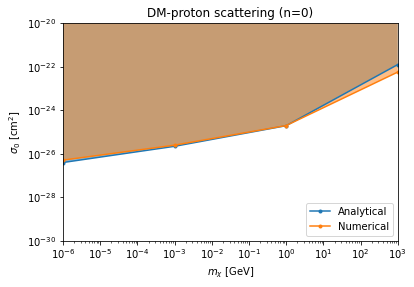

In [2]:
import numpy as np
from scipy.optimize import fsolve

k = 0.42 #1/Mpc

def k_crit(mx,sigma0,omega_b=0.05,omega_rad=9.23640e-5,
                 H0=67.27,kT0=2.353e-13,rho_crit=4.755e-6,
                 cc=3e5,Mpc2cm=3.086e24,reduction_factor=1.,mp=1.,YHe=0.25,n=0.):
    N0 = (pow(2.,(7./2.)))/(3.*np.sqrt(np.pi))
    B = cc*Mpc2cm*N0*omega_b*rho_crit*(1.-YHe)*np.sqrt(kT0)
    zth = np.power((H0*(np.sqrt(omega_rad))*(np.sqrt(mx+mp))*(np.sqrt(mx*mp))*((mx+mp)/mx))/(B*sigma0), 2./3.)
    #print(zth)
    H = H0*np.sqrt(omega_rad)
    def f(z):
         return(B*(z**3.)*sigma0*(1./(mx+mp))*(((z/mp)+((z**2.)/(mx*zth)))**(0.5))) - (H*(z**2.))
    zcrit = fsolve(f, zth)
    #print(zcrit)
    kcrit = (2*H0*(np.sqrt(omega_rad))*zcrit)/cc
    return zth, zcrit, kcrit

masses = np.array([1e-6, 1e-3, 1., 1e3])
sigmas = np.zeros(len(masses))
sigma_array = np.logspace(-18,-30,1000)

for i in range(len(masses)):
    mx=masses[i]
    print("mx:", format(mx, 'e'))
    
    zdec, zdecprime, kdec = k_crit(mx=mx, sigma0=sigma_array)
    sigmas[i] = sigma_array[np.argmin(np.abs(kdec-k))]
    print("zth:", zdec[np.argmin(np.abs(kdec-k))])
    print("zcrit:", zdecprime[np.argmin(np.abs(kdec-k))], "\n")
    
print(sigmas)

import matplotlib.pyplot as plt

proton_chains = np.array([5.02e-27, 2.45e-26, 1.96e-25, 5.64e-23])

f,ax = plt.subplots()

ax.plot(masses, sigmas, marker='.', label='Analytical')
ax.plot(masses, proton_chains, marker='.', label='Numerical')
ax.set_title('DM-proton scattering (n=0)')
ax.set_xlabel('$m_\chi$ $[\mathrm{GeV}]$')
ax.set_ylabel('$\sigma_0$ $[\mathrm{cm}^2]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-6, 1.0e3])
ax.set_ylim([1.0e-30, 1.0e-20])
ax.fill_between(masses, sigmas, 1.0e-20, alpha=0.5)
ax.fill_between(masses, proton_chains, 1.0e-20, alpha=0.5)
plt.legend(loc="lower right")

print("Percent errors:")
for i in range(len(sigmas)):
    error = abs((proton_chains[i]-sigmas[i])/sigmas[i])*100
    print(format(masses[i], 'e'), ":", error)

mx: 1e-06
zth: 456671.82075219066
zcrit: 19972.333828000406 

mx: 1e-03
zth: 25637.637148333786
zcrit: 19980.04483011891 

mx: 1e+00
zth: 19948.280674775753
zcrit: 19941.489008883043 

mx: 1e+03
zth: 19846.40375042482
zcrit: 19846.396989420653 

[5.91250841e-27 7.12611543e-26 5.59432571e-23 5.63314267e-20]
Percent errors:
1e-06 : 83.3%
1e-03 : 91.9%
1e+00 : 90.1%
1e+03 : 84.5%


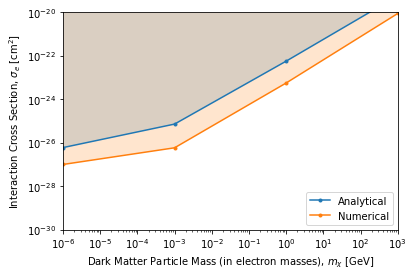

In [2]:
import numpy as np
from scipy.optimize import fsolve

k = 0.0857 #0.0857

def k_crit(mx,sigma0,omega_b=0.05,omega_rad=9.23640e-5,
                 H0=67.27,kT0=2.353e-13,rho_crit=4.755e-6,
                 cc=3e5,Mpc2cm=3.086e24,reduction_factor=1.,mp=0.511e-3,YHe=0.25,n=0.):
    N0 = (pow(2.,(7./2.)))/(3.*np.sqrt(np.pi))
    B = cc*Mpc2cm*N0*omega_b*rho_crit*((1.-YHe)/1836.152)*np.sqrt(kT0)
    zth = np.power((H0*(np.sqrt(omega_rad))*(np.sqrt(mx+mp))*(np.sqrt(mx*mp))*((mx+mp)/mx))/(B*sigma0), 2./3.)
    #print(zth)
    H = H0*np.sqrt(omega_rad)
    def f(z):
         return(B*(z**3.)*sigma0*(1./(mx+mp))*(((z/mp)+((z**2.)/(mx*zth)))**(0.5))) - (H*(z**2.))
    zcrit = fsolve(f, zth)
    #print(zcrit)
    kcrit = (2*H0*(np.sqrt(omega_rad))*zcrit)/cc
    return zth, zcrit, kcrit

masses = np.array([1e-6, 1e-3, 1., 1e3])
sigmas = np.zeros(len(masses))
sigma_array = np.logspace(-18,-30,1000)

for i in range(len(masses)):
    mx=masses[i]
    print("mx:", format(mx, '.0e'))
    
    zdec, zdecprime, kdec = k_crit(mx=mx, sigma0=sigma_array)
    sigmas[i] = sigma_array[np.argmin(np.abs(kdec-k))]
    print("zth:", zdec[np.argmin(np.abs(kdec-k))])
    print("zcrit:", zdecprime[np.argmin(np.abs(kdec-k))], "\n")
    
print(sigmas)

import matplotlib.pyplot as plt

electron_chains = np.array([9.90e-28, 5.78e-27, 5.53e-24, 8.71e-21])

f,ax = plt.subplots()

ax.plot(masses, sigmas, marker='.', label='Analytical')
ax.plot(masses, electron_chains, marker='.', label='Numerical')
#ax.set_title('DM-electron scattering (n=0, Vrel=0)')
ax.set_xlabel('Dark Matter Particle Mass (in electron masses), $m_\chi$ $[\mathrm{GeV}]$')
ax.set_ylabel('Interaction Cross Section, $\sigma_e$ $[\mathrm{cm}^2]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-6, 1.0e3])
ax.set_ylim([1.0e-30, 1.0e-20])
ax.fill_between(masses, sigmas, 1.0e-20, alpha=0.2)
ax.fill_between(masses, electron_chains, 1.0e-20, alpha=0.2)
plt.legend(loc='lower right')
plt.savefig('dme_analytical.pdf')
plt.savefig('dme_analytical.png', dpi=300)

print("Percent errors:")
for i in range(len(sigmas)):
    error = abs((electron_chains[i]-sigmas[i])/sigmas[i])
    print(format(masses[i], '.0e'), ":", format(error, '.1%'))

In [6]:
import numpy as np
from scipy.optimize import fsolve
from scipy.special import gamma

k = 0.42

def k_crit(mx,sigma0,n,omega_b=0.05,omega_rad=9.23640e-5,
                 H0=67.27,kT0=2.353e-13,rho_crit=4.755e-6,
                 cc=3e5,Mpc2cm=3.086e24,reduction_factor=1.,mp=0.511e-3,YHe=0.25):
    N0 = pow(2,(5.+n)/2.)*gamma(3.+n/2.)/(3.*np.sqrt(np.pi))
    B = cc*Mpc2cm*N0*omega_b*rho_crit*((1.-YHe)/1836.152)*pow(kT0, (n+1.)/2.)
    zth = np.power((H0*(np.sqrt(omega_rad))*(pow((mx*mp)/(mx+mp), (n+1.)/2))*((pow(mx+mp, 2.))/mx))/(B*sigma0), 2./(n+3.))
    #print(zth)
    H = H0*np.sqrt(omega_rad)
    def f(z):
         return(B*(z**3.)*sigma0*(1./(mx+mp))*(pow((z/mp)+((z**2.)/(mx*zth)), (n+1.)/2)) - (H*(z**2.)))
    zcrit = fsolve(f, zth)
    #print(zcrit)
    kcrit = (2*H0*(np.sqrt(omega_rad))*zcrit)/cc
    return zth, zcrit, kcrit

masses = np.array([1e-6, 1e-3, 1., 1e3])
sigma_array = np.logspace(-5,-30,1000)
ns = np.array([0., 2., 4., 6.])
sigmaout = np.array([np.zeros(len(masses)), np.zeros(len(masses)), np.zeros(len(masses)), np.zeros(len(masses))])

for j in range(len(ns)):
    sigmas = np.zeros(len(masses))
    for i in range(len(masses)):
        mx=masses[i]
        print("mx:", format(mx, '.0e'))
    
        zdec, zdecprime, kdec = k_crit(mx=mx, sigma0=sigma_array, n=ns[j])
        sigmas[i] = sigma_array[np.argmin(np.abs(kdec-k))]
        print("zth:", zdec[np.argmin(np.abs(kdec-k))])
        print("zcrit:", zdecprime[np.argmin(np.abs(kdec-k))], "\n")
    
    print("n =", ns[j])
    print(sigmas, "\n")
    sigmaout[j] = sigmas

print(sigmaout)

mx: 1e-06
zth: 2267950.5272753322
zcrit: 99187.78207406001 

mx: 1e-03
zth: 123469.78142315909
zcrit: 96223.05494561423 

mx: 1e+00
zth: 98612.69568184736
zcrit: 98579.12163640605 

mx: 1e+03
zth: 98109.07542996648
zcrit: 98109.04200749476 

n = 0.0
[5.34229330e-28 6.74262224e-27 5.08987019e-24 5.12518693e-21] 

mx: 1e-06
zth: 459876.015831241
zcrit: 96411.42398807018 

mx: 1e-03
zth: 111001.37269913143
zcrit: 96663.29929870977 

mx: 1e+00
zth: 97341.62881250696
zcrit: 97321.745389593 

mx: 1e+03
zth: 97062.85883189054
zcrit: 97062.8389922553 

n = 2.0
[8.99402217e-27 1.70699493e-23 1.92879151e-20 1.94217468e-17] 

mx: 1e-06
zth: 278193.6235244337
zcrit: 98209.98040013728 

mx: 1e-03
zth: 107824.5749749279
zcrit: 97996.78993551355 

mx: 1e+00
zth: 96813.78429869135
zcrit: 96799.6592799096 

mx: 1e+03
zth: 98233.78236843963
zcrit: 98233.76802631743 

n = 4.0
[6.02254120e-26 3.05833803e-20 5.47947234e-17 5.20854855e-14] 

mx: 1e-06
zth: 213473.0131681883
zcrit: 97779.01264134399 

mx: 1e

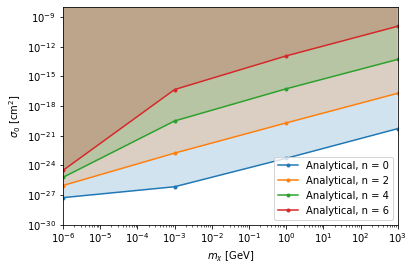

In [8]:
import matplotlib.pyplot as plt

f,ax = plt.subplots()

ax.plot(masses, sigmaout[0], marker='.', label='Analytical, n = 0')
ax.plot(masses, sigmaout[1], marker='.', label='Analytical, n = 2')
ax.plot(masses, sigmaout[2], marker='.', label='Analytical, n = 4')
ax.plot(masses, sigmaout[3], marker='.', label='Analytical, n = 6')
#ax.set_title('DM-electron scattering (n=0, Vrel=0)')
ax.set_xlabel('$m_\chi$ $[\mathrm{GeV}]$')
ax.set_ylabel('$\sigma_0$ $[\mathrm{cm}^2]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-6, 1.0e3])
ax.set_ylim([1.0e-30, 1.0e-8])
ax.fill_between(masses, sigmaout[0], 1.0e-8, alpha=0.2)
ax.fill_between(masses, sigmaout[1], 1.0e-8, alpha=0.2)
ax.fill_between(masses, sigmaout[2], 1.0e-8, alpha=0.2)
ax.fill_between(masses, sigmaout[3], 1.0e-8, alpha=0.2)
plt.legend(loc='lower right')
#plt.savefig('dme_analytical.pdf')

In [4]:
print("Analytical:")
print("TeV n2/n0 =", sigmaout[1][3]/sigmaout[0][3])
print("TeV n4/n2 =", sigmaout[2][3]/sigmaout[1][3])
print("TeV n6/n4 =", sigmaout[3][3]/sigmaout[2][3])

n0 = 3.76E-21
n2 = 4.15E-17
n4 = 1.15E-13
n6 = 1.08E-09

print("\nNumerical:")
print("TeV n2/n0 =", n2/n0)
print("TeV n4/n2 =", n4/n2)
print("TeV n6/n4 =", n6/n4)

print("\nPercent errors:")
print(format(abs(((n2/n0)-(sigmaout[1][3]/sigmaout[0][3]))/(sigmaout[1][3]/sigmaout[0][3])), ".1%"))
print(format(abs(((n4/n2)-(sigmaout[2][3]/sigmaout[1][3]))/(sigmaout[2][3]/sigmaout[1][3])), ".1%"))
print(format(abs(((n6/n4)-(sigmaout[3][3]/sigmaout[2][3]))/(sigmaout[3][3]/sigmaout[2][3])), ".1%"))

Analytical:
TeV n2/n0 = 3789.4709190746717
TeV n4/n2 = 2681.812609453029
TeV n6/n4 = 2256.074066496864

Numerical:
TeV n2/n0 = 11037.234042553191
TeV n4/n2 = 2771.084337349397
TeV n6/n4 = 9391.304347826088

Percent errors:
191.3%
3.3%
316.3%


In [5]:
print("Analytical:")
print("TeV n2/n0 =", sigmaout[1][3]/sigmaout[0][3])
print("TeV n4/n2 =", sigmaout[2][3]/sigmaout[1][3])
print("TeV n6/n4 =", sigmaout[3][3]/sigmaout[2][3])

n0 = 8.71E-21
n2 = 4.15E-17
n4 = 1.15E-13
n6 = 6.88E-10

print("\nNumerical:")
print("TeV n2/n0 =", n2/n0)
print("TeV n4/n2 =", n4/n2)
print("TeV n6/n4 =", n6/n4)

print("\nPercent errors:")
print(format(abs(((n2/n0)-(sigmaout[1][3]/sigmaout[0][3]))/(sigmaout[1][3]/sigmaout[0][3])), ".1%"))
print(format(abs(((n4/n2)-(sigmaout[2][3]/sigmaout[1][3]))/(sigmaout[2][3]/sigmaout[1][3])), ".1%"))
print(format(abs(((n6/n4)-(sigmaout[3][3]/sigmaout[2][3]))/(sigmaout[3][3]/sigmaout[2][3])), ".1%"))

Analytical:
TeV n2/n0 = 3789.4709190746717
TeV n4/n2 = 2681.812609453029
TeV n6/n4 = 2256.074066496864

Numerical:
TeV n2/n0 = 4764.638346727899
TeV n4/n2 = 2771.084337349397
TeV n6/n4 = 5982.608695652175

Percent errors:
25.7%
3.3%
165.2%
